In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
pd.set_option('max_rows', 50)

In [2]:
primary_results = pd.read_csv('~/Downloads/2016-us-election/primary_results.csv')

In [3]:
primary_results

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
6,Alabama,AL,Bibb,1007.0,Democrat,Bernie Sanders,246,0.197
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
8,Alabama,AL,Blount,1009.0,Democrat,Bernie Sanders,395,0.386
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551


In [4]:
county_facts = pd.read_csv('~/Downloads/2016-us-election/county_facts.csv')

In [5]:
county_facts

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
5,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
6,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9
7,1011,Bullock County,AL,10764,10915,-1.4,10914,6.3,21.4,14.9,...,0.0,38.8,0,0,43810,3995,3670,1,622.81,17.5
8,1013,Butler County,AL,20296,20946,-3.1,20947,6.1,23.6,18.0,...,0.0,0.0,399132,56712,229277,11326,28427,2,776.83,27.0
9,1015,Calhoun County,AL,115916,118586,-2.3,118572,5.7,22.2,16.0,...,0.5,24.7,2679991,0,1542981,13678,186533,114,605.87,195.7


In [6]:
county_facts_dict = pd.read_csv('~/Downloads/2016-us-election/county_facts_dictionary.csv')

In [7]:
county_facts_dict

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"
5,AGE295214,"Persons under 18 years, percent, 2014"
6,AGE775214,"Persons 65 years and over, percent, 2014"
7,SEX255214,"Female persons, percent, 2014"
8,RHI125214,"White alone, percent, 2014"
9,RHI225214,"Black or African American alone, percent, 2014"


In [8]:
data = primary_results.merge(county_facts,how='left', left_on = 'county', right_on = 'area_name')

In [9]:
data

,state,state_abbreviation_x,county,fips_x,party,candidate,votes,fraction_votes,fips_y,area_name,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Alabama,AL,Bibb,1007.0,Democrat,Bernie Sanders,246,0.197,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Alabama,AL,Blount,1009.0,Democrat,Bernie Sanders,395,0.386,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Looks like there is no statistically significant relationship between trump/clinton votes and the percentage of women owned firms in the county


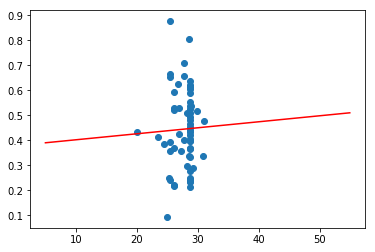

In [16]:
trump = data[data.candidate == 'Donald Trump']
trump = trump[trump.SBO015207 > 0]

X = pd.DataFrame({"SBO015207": np.arange(5, 55, 0.1)})
model = LinearRegression()
model.fit(trump[['SBO015207']], trump['fraction_votes'])
y_pred = model.predict(X)



plt.plot(X, y_pred, 'r-')
plt.scatter(x=trump['SBO015207'], y = trump['fraction_votes'])

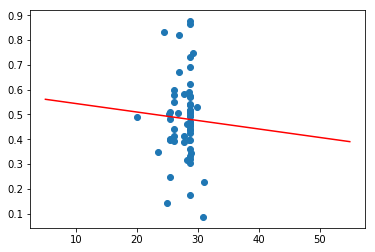

In [11]:
clinton = data[data.candidate == 'Hillary Clinton']
clinton = clinton[clinton.SBO015207 > 0]
clinton = clinton[clinton.votes < 75000]

X = pd.DataFrame({"SBO015207": np.arange(5, 55, 0.1)})
model = LinearRegression()
model.fit(clinton[['SBO015207']], clinton['fraction_votes'])
y_pred = model.predict(X)



plt.plot(X, y_pred, 'r-')
plt.scatter(x=clinton['SBO015207'], y = clinton['fraction_votes'])

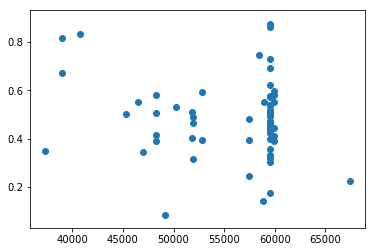

In [12]:
clinton = data[data.candidate == 'Hillary Clinton']
plt.scatter(x=clinton['INC110213'], y = clinton['fraction_votes'])

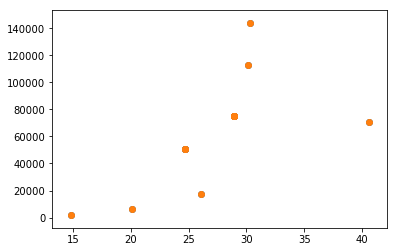

In [13]:
clinton = clinton[clinton.VET605213 < 150000]
plt.scatter(x=clinton['EDU685213'], y = clinton['VET605213'])

trump = trump[trump.VET605213 < 150000]
plt.scatter(x=trump['EDU685213'], y = trump['VET605213'])

### Nothing groundbreaking, but there is a significant relationship between percent of females in the county and the fraction of the vote trump got. 


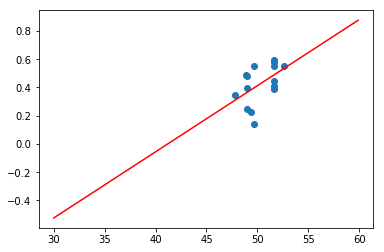

In [14]:
X = pd.DataFrame({"SEX255214": np.arange(30, 60, 0.1)})
model = LinearRegression()
model.fit(clinton[['SEX255214']], clinton['fraction_votes'])
y_pred = model.predict(X)


plt.plot(X, y_pred, 'r-')
plt.scatter(x = clinton['SEX255214'], y = clinton['fraction_votes'])

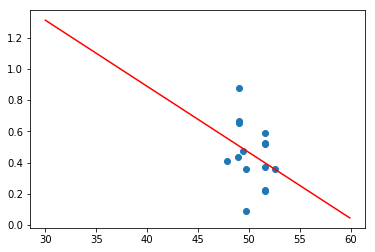

In [15]:
X = pd.DataFrame({"SEX255214": np.arange(30, 60, 0.1)})
model = LinearRegression()
model.fit(trump[['SEX255214']], trump['fraction_votes'])
y_pred = model.predict(X)


plt.plot(X, y_pred, 'r-')
plt.scatter(x = trump['SEX255214'], y = trump['fraction_votes'])